In [56]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [57]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [46]:
# 特徴量と目的変数を分離
X = df.loc[:, df.columns!='species']
y = df['species'].values
# 標準化
X = StandardScaler().fit_transform(X)

In [28]:
pca = PCA(n_components=2)
pca.fit(X)
X_pc = pca.transform(X)

In [32]:
y = y.reshape(-1, 1)
df_pc = pd.DataFrame(np.concatenate([X_pc, y], axis=1), 
                     columns=['first component', 'second component', 'species']).astype({'first component':float, 'second component':float})

matplotlib.axes._subplots.AxesSubplot

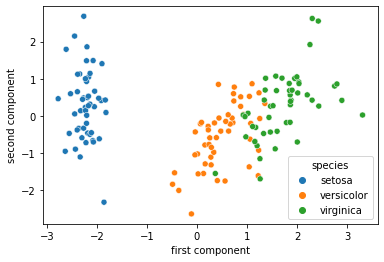

In [43]:
fig, axes = plt.subplots()
type(sns.scatterplot(x='first component', y='second component', hue=df_pc['species'], data=df_pc, ax=axes))

In [17]:
pca = PCA(n_components=4)
pca.fit(X)
# 寄与率
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [18]:
np.cumsum(pca.explained_variance_ratio_)

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

Text(0, 0.5, 'cumulative explained variance')

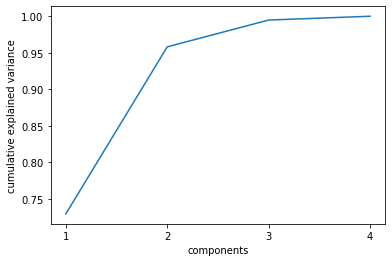

In [19]:
n_components = 4
plt.plot(range(1, n_components+1), np.cumsum(pca.explained_variance_ratio_))
plt.xticks(range(1, n_components+1))
plt.xlabel('components')
plt.xlabel('components')
plt.ylabel('cumulative explained variance')

In [ ]:
いるリストのローリングしたdfを作る
↓


In [21]:
def do_pca(df, n_components=2):
    """
    データフレームをPCAした結果のインスタンスを返す
    
    paramaters:
    -------------
    df(DataFrame):PCAをしたいデータフレーム(標準化の必要なし)
    n_components:次元削減後の次元数
    
    returns:
    ------------
    pca: pcaインスタンス
    """
    
    df = StandardScaler().fit_transform(df)  # 標準化
    pca = PCA(n_components=n_components)
    pca.fit(df)
    
    return pca

In [88]:
def pca_scatter_plot(df, n_components=2, hue=None):
    """
    データフレームを主成分分析した結果を散布図表示する
    
    paramaters:
    ----------------
    df(DataFrame): 主成分分析するデータフレーム
    n_components(int): 次元削減後の次元数(2または３のみ可)
    hue（Series):　ヒュー
    
    returns:
    ---------------
    """
    
    
    # pca = do_pca(df.copy(), n_components)
    df = StandardScaler().fit_transform(df)  # 標準化
    pca = PCA(n_components=n_components)
    pca.fit(df)
    pcs = pca.transform(df)  # 主成分得点(PCS)の算出
    
    if n_components == 2:
        fig, ax = plt.subplots()
        df_pc = pd.DataFrame(pcs,columns=['first component', 'second component']).astype({'first component':float, 'second component':float})
        sns.scatterplot(x='first component', y='second component', hue=hue, data=df_pc, ax=ax)
    elif n_components == 3:
        # fig, axes = plt.subplots(subplot_kw=dict(projection='3d'))
        df_pc = pd.DataFrame(pcs,columns=['first component', 'second component', "third component"]).astype({'first component':float, 'second component':float, "third component":float})
        # axes.scatter("first component", 'second component',  "third component", hue=hue, data=df_pc)
        fig = plt.figure(figsize=(15, 15))
        ax = fig.add_subplot(projection = '3d')
        ax.scatter(xs="first component", ys='second component', zs="third component", data=df_pc, c=hue)
        ax.set_xlabel(df_pc.columns[0])
        ax.set_ylabel(df_pc.columns[1])
        ax.set_zlabel(df_pc.columns[2])
        plt.close()
        
    return fig

In [92]:
def view_explained_variance(df, n_components):
    """
    
    """
    
    df = StandardScaler().fit_transform(df)  # 標準化
    pca = PCA(n_components=n_components)
    pca.fit(df)
    pcs = pca.transform(df)  # 主成分得点(PCS)の算出
    
    
    plt.plot(range(1, n_components+1), np.cumsum(pca.explained_variance_ratio_))
    plt.xticks(range(1, n_components+1))
    plt.xlabel('components')
    plt.xlabel('components')
    plt.ylabel('cumulative explained variance')

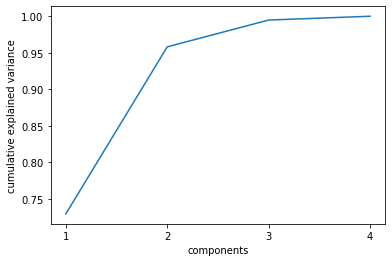

In [93]:
X = df.loc[:, df.columns!='species']
y = df["species"]
y = pd.get_dummies(y)
# display(pca_scatter_plot(X, 3,y))
view_explained_variance(X, 4)

In [96]:
from sklearn.model_selection import train_test_split
import xgboost
from xgboost import XGBRegressor

In [102]:
#ボストン住宅価格データセットの読み込み
from sklearn.datasets import load_boston
boston = load_boston()
#説明変数
X_array = boston.data
#目的変数
y_array = boston.target

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, test_size=0.3)

In [107]:
model = XGBRegressor(early_stopping_rounds=10)

In [108]:
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_set=eval_set, verbose=True)

[0]	validation_0-rmse:16.59420
[1]	validation_0-rmse:12.35089
[2]	validation_0-rmse:9.31704
[3]	validation_0-rmse:7.26316
[4]	validation_0-rmse:5.89411
[5]	validation_0-rmse:5.01204
[6]	validation_0-rmse:4.41361
[7]	validation_0-rmse:4.18008
[8]	validation_0-rmse:3.94905
[9]	validation_0-rmse:3.85554
[10]	validation_0-rmse:3.81010
[11]	validation_0-rmse:3.74718
[12]	validation_0-rmse:3.71329
[13]	validation_0-rmse:3.73444
[14]	validation_0-rmse:3.71647
[15]	validation_0-rmse:3.68897
[16]	validation_0-rmse:3.68969
[17]	validation_0-rmse:3.68117
[18]	validation_0-rmse:3.66463
[19]	validation_0-rmse:3.66267
[20]	validation_0-rmse:3.65977
[21]	validation_0-rmse:3.65651
[22]	validation_0-rmse:3.66505
[23]	validation_0-rmse:3.66246
[24]	validation_0-rmse:3.68230
[25]	validation_0-rmse:3.68514
[26]	validation_0-rmse:3.68862
[27]	validation_0-rmse:3.67826
[28]	validation_0-rmse:3.67727
[29]	validation_0-rmse:3.67240
[30]	validation_0-rmse:3.66935


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=10, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

<BarContainer object of 13 artists>

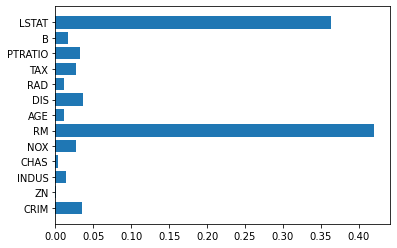

In [114]:
model.feature_importances_
plt.barh(boston.feature_names, model.feature_importances_)